In [88]:
# CSC 419 Homework Assignment 2
# Basic Classification - Part 2
# Code run/edit by Kristopher Smolarek (F00568254)
# Submitted May 26, 2024

# Get required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree

In [89]:
# Read transaction data .csv file to dataframe
# The .csv file is first uploaded to the Colab notebook
df = pd.read_csv('/content/transaction_data.csv')

# Test print to ensure data transmission
#print("Dataframe: \n\n", df)
df.head()

,distance_from_home,price_ratio,fraud
0,1.5,1.2,0
1,1.6,1.0,0
2,1.7,0.8,0
3,1.8,1.5,0
4,2.0,4.0,1


In [90]:
# Get overall information about transaction_data.csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   distance_from_home  39 non-null     float64
 1   price_ratio         39 non-null     float64
 2   fraud               39 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


<Axes: xlabel='distance_from_home', ylabel='price_ratio'>

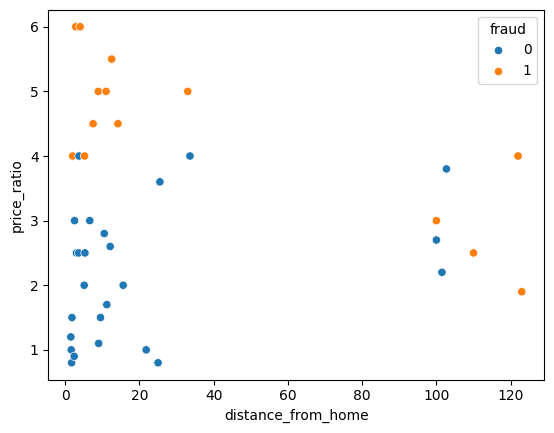

In [91]:
# Visualize raw data using matplotlib, seaborn as sns
sns.scatterplot(x=df['distance_from_home'], y=df['price_ratio'], hue=df['fraud'])

In [92]:
# Split the data into features (X) and target (y)
X = df.drop('fraud', axis=1)
y = df[['fraud']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
# Training the decision tree classifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [94]:
# Test accuracy (using the classifier on test data)
y_predict = clf_model.predict(X_test)

In [95]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


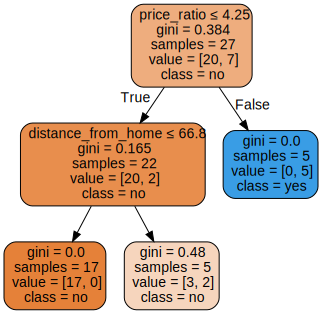

In [96]:
# Plotting the decision tree
target = ['no', 'yes']
feature_names = list(X.columns)
dot_data = tree.export_graphviz(clf_model,
                                out_file=None,
                      feature_names=feature_names,
                      class_names=target,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [97]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- price_ratio <= 4.25
|   |--- distance_from_home <= 66.80
|   |   |--- class: 0
|   |--- distance_from_home >  66.80
|   |   |--- class: 0
|--- price_ratio >  4.25
|   |--- class: 1



In [100]:
# Final output from classification model
y_pred = clf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.42857142857142855
